# ECSE 415
## Assignment 4
### Abbas Yadollahi - 260680343

# 1. Data Acquisition

In [ ]:
import os
import cv2
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

In [4]:
def plotFigures(figures, size=5):
    """
    :param figures: List of figures to plot
    :param title: Title to give to the figures
    :param size: Width size of the grid
    """

    for img_set, images in figures.items():
        plt.figure(figsize=(15, 15))
        for i, img in enumerate(images, 1):
            plt.subplot(size, size, i), plt.imshow(img, 'gray')
            plt.title('{} - {}'.format(img_set, i)), plt.axis('off')
        plt.show()

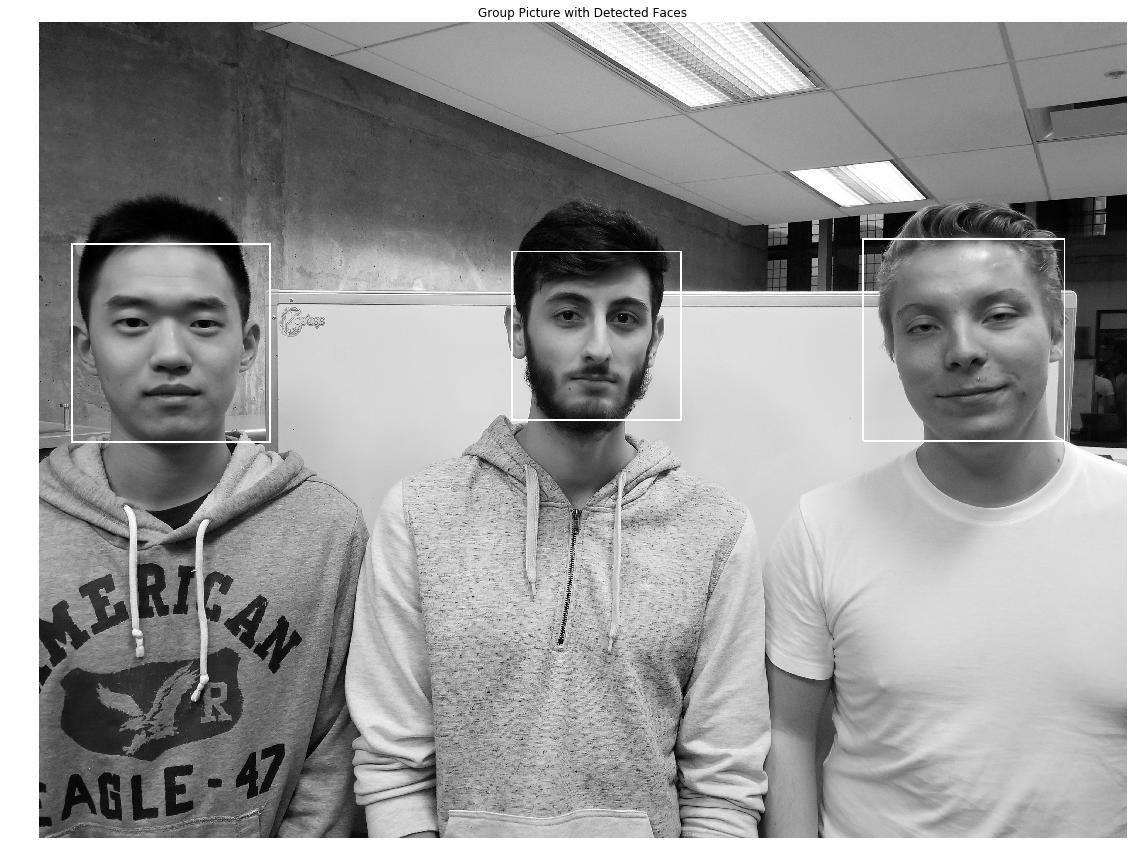

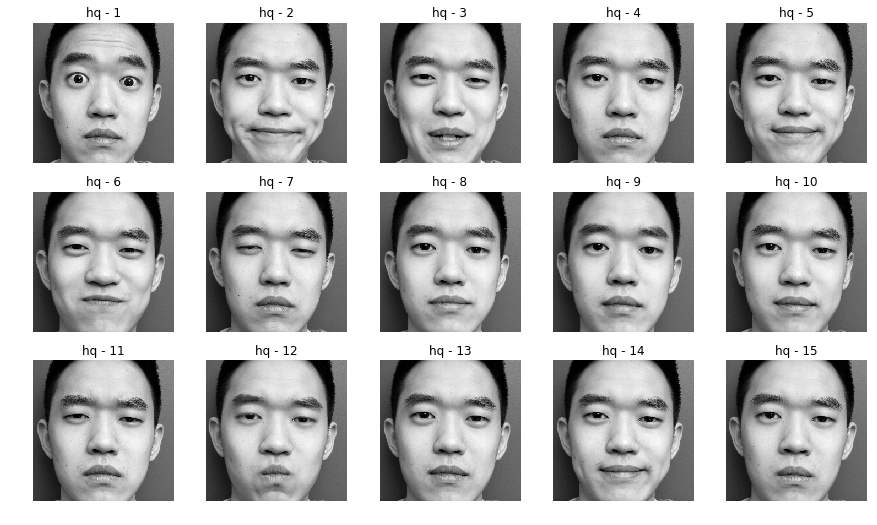

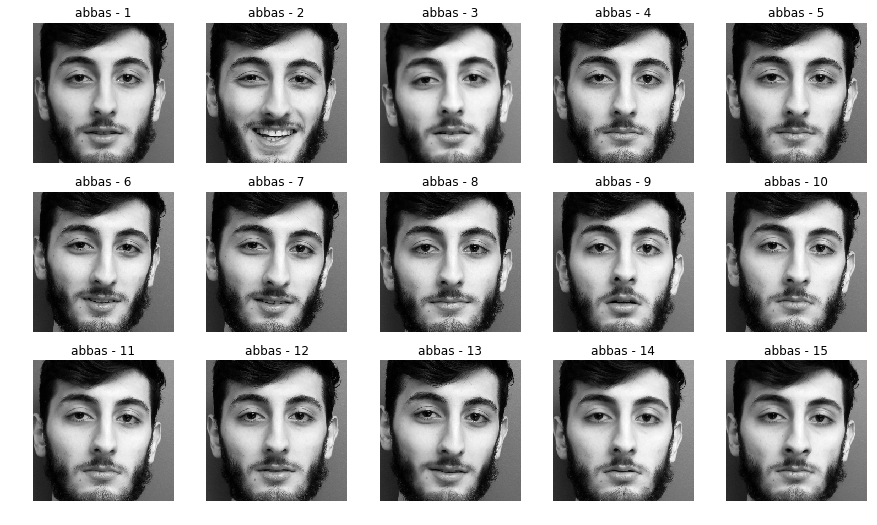

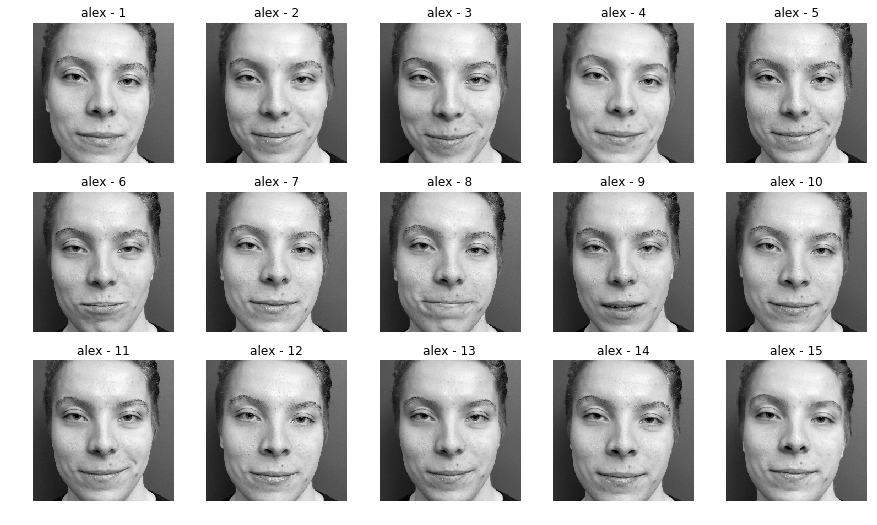

In [5]:
test_path = 'dataset/test/group.jpg'
train_path = 'dataset/train/'

# Detect all faces in group picture
face_cascade = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml'))
group = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
group_faces = face_cascade.detectMultiScale(group, 1.2, 10)

# Draw a box around each detected face
group_copy = group.copy()
for (x, y, w, h) in group_faces:
    cv2.rectangle(group_copy, (x, y), (x+w, y+h), (255, 255, 255), 5)

# Display test image
plt.figure(figsize=(30, 15))
plt.title("Group Picture with Detected Faces")
plt.imshow(group_copy, 'gray'), plt.axis('off')
plt.show()

# Read all training images
X, Y = [], []
train_sets = {}
size = (256, 256)
for img_set in os.listdir(train_path):
    images = []
    for img in os.listdir(os.path.join(train_path, img_set)):
        face = cv2.imread(os.path.join(train_path, img_set, img), cv2.IMREAD_GRAYSCALE)
        p = face_cascade.detectMultiScale(face, 1.05, 15)
        if len(p):
            x, y, w, h = p[0]
            face = face[y:y+h, x:x+w]
        face = cv2.resize(face, size)
        images.append(face)
        X.append(face), Y.append(img_set)
    train_sets[img_set] = images

# Display training images
plotFigures(train_sets)

**Describe how you selected the images with respect to the conditions of the detection/classification methods.**

Gang

(45, 45)
[6.53720881e-01 1.20318134e-01 4.11597828e-02 3.24499499e-02
 1.81199671e-02 1.45746377e-02 1.28221223e-02 1.21532177e-02
 8.88549822e-03 7.57861109e-03 6.16689800e-03 5.09869764e-03
 5.00960835e-03 4.39579666e-03 4.17717460e-03 4.06393411e-03
 3.50127207e-03 3.33883431e-03 2.80572777e-03 2.76369289e-03
 2.47567117e-03 2.44703645e-03 2.27109470e-03 2.21509150e-03
 2.08974503e-03 1.98835778e-03 1.93917134e-03 1.84538418e-03
 1.80647228e-03 1.74984733e-03 1.67241705e-03 1.61988208e-03
 1.45676521e-03 1.29784126e-03 1.26299869e-03 1.23834368e-03
 1.17043582e-03 1.10802350e-03 1.01978968e-03 9.65442562e-04
 9.15645314e-04 8.53854907e-04 8.04290235e-04 6.81960392e-04
 6.56952740e-31]


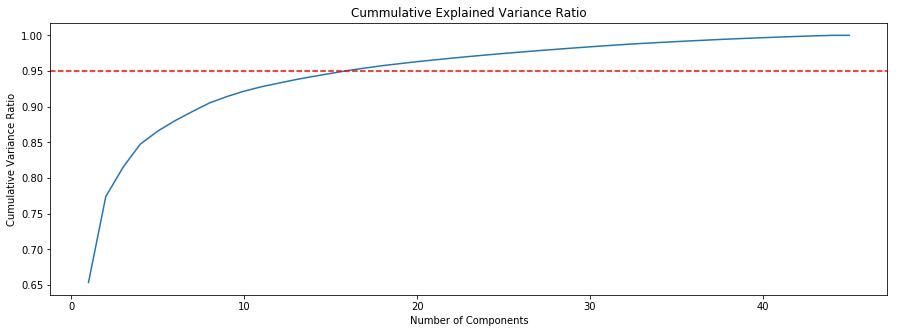

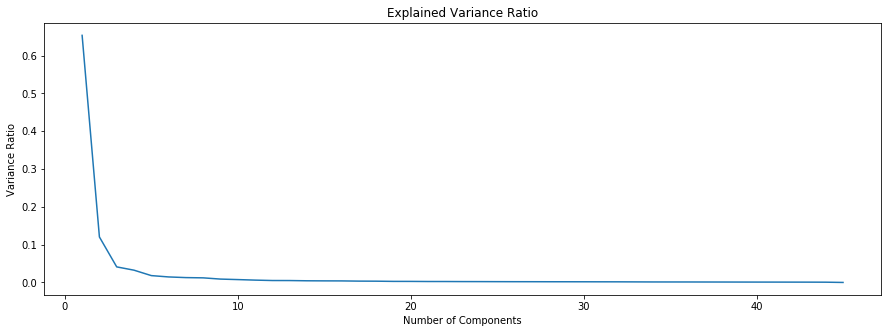

In [16]:
x, y = np.array(X), np.array(Y)
x = x.reshape(x.shape[0], -1)

# Create PCA and transform the test set
pca = PCA()
x_pca = pca.fit_transform(x)
evr_size = pca.explained_variance_ratio_.size

# Print the variance explained by every principal component
print(x_pca.shape)
print(pca.explained_variance_ratio_)

#fit transform -> 30x30 weight array
#fit -> components_ -> eigenfaces

# Plot the cumulative summation of the explained variance
plt.figure(figsize=(15, 5))
plt.plot(range(1, evr_size+1), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components'), plt.ylabel('Cumulative Variance Ratio')
plt.title('Cummulative Explained Variance Ratio')
plt.show()

# Plot explained variance against the number of components
plt.figure(figsize=(15, 5))
plt.plot(range(1, evr_size+1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components'), plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

In [18]:
# Create PCA with 15 components and transform the test set
start = time.time()
pca15 = PCA(n_components=15)
pca15.fit_transform(x)
print('PCA using 15 components')
print(f'Variance Ratio: {sum(pca15.explained_variance_ratio_)}')
print(f'Computation time: {time.time()-start}\n')

# Create PCA with 45 components and transform the test set
pca45 = PCA(n_components=45)
pca45.fit_transform(x)
print('PCA using 45 components')
print(f'Variance Ratio: {sum(pca45.explained_variance_ratio_)}')
print(f'Computation time: {time.time()-start}')

PCA using 15 components
Variance Ratio: 0.9466220904357687
Computation time: 0.8839898109436035

PCA using 45 components
Variance Ratio: 0.9999999999999999
Computation time: 1.7538816928863525


**Do you need all the vectors to represent the data?**

Gang

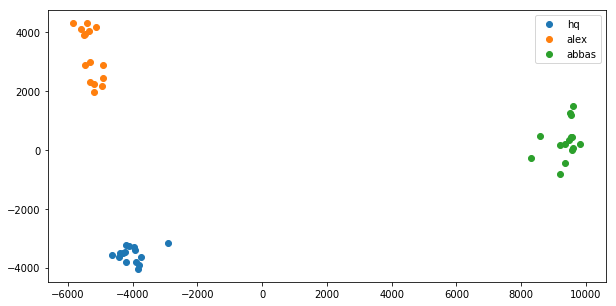

In [20]:
people = set(y)

plt.figure(figsize=(10, 5))
for mans in people:
    x_set = x_pca[y == mans, :]
    plt.scatter(x_set[:,0], x_set[:,1])
    plt.legend(people)

plt.show()

In [21]:
# Use K-nearest neighbors to evaluate clustering on eigenspace and original pixel space
start = time.time()
knc = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knc.fit(x_pca, y)
pred = knc.predict(x_pca)
print(f'Eigenspace accuracy: {accuracy_score(y, pred)}')
print(f'Computation time: {time.time()-start}\n')

start = time.time()
knc = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knc.fit(x, y)
pred = knc.predict(x)
print(f'Pixel space accuracy: {accuracy_score(y, pred)}')
print(f'Computation time: {time.time()-start}')

Eigenspace accuracy: 1.0
Computation time: 0.00558924674987793

Pixel space accuracy: 1.0
Computation time: 0.24240827560424805
